In [779]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
# df = pd.read_excel("../../")
print("heelo")

heelo


[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.
 72. 74. 76. 78. 80.]


c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\764713310.py:43: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df.to_latex(


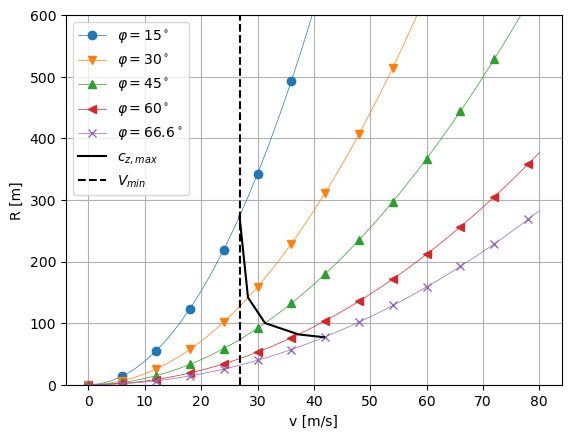

In [780]:
def R(v, phi):
    return v**2/(9.81*np.tan(np.deg2rad(phi)))

def cz(m, v, phi):
    S = 15
    rho = 1.225
    return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))

def v_min(m, phi):
    S = 15
    rho = 1.225
    return np.sqrt(2*m*9.81/(rho*S*np.cos(np.deg2rad(phi))))

def r_tan(phi, v):
    return v**2/(9.81*np.tan(np.deg2rad(phi)))

phi_list = [15, 30, 45, 60, 66.6]
v = np.linspace(0, 80, 41)


print(v)


df_czmax = pd.DataFrame() 
df_czmax['v'] = v_min(650, phi_list)
df_czmax["r"] = r_tan(phi_list, df_czmax['v'])

# polyfit for r(v)
poly = np.polyfit(df_czmax['v'], df_czmax['r'], 8)
poly_r = np.poly1d(poly)

df = pd.DataFrame(columns=[f"R_{i}" for i in phi_list], index=v)
for phi in phi_list:
    df[f"R_{phi}"] = R(v, phi)
    

    

df.columns = [f"$R(\\varphi = {i}^\\circ)$" for i in phi_list]

# save the data to latex table
with open("../latex_raport/R_table.tex", "w") as f:
    f.write(df.to_latex(
        escape = False,
        float_format="%.2f",
    )) 

# create list of different markers the same size as phi_list
markers = ["o", "v", "^", "<", "x"]


fig,ax = plt.subplots()
for marker,phi in zip(markers,phi_list):
    ax.plot(v, df[f"$R(\\varphi = {phi}^\\circ)$"], label = f"$\\varphi = {phi}^\\circ$", marker = marker, linewidth = 0.5, markevery=3) 

ax.plot(df_czmax['v'], df_czmax['r'], label = "$c_{z,max}$", color = 'black')

# v_czmax = np.linspace(min(df_czmax['v']), max(df_czmax['v']), 100)
# ax.plot(v_czmax, poly_r(v_czmax), label = "$c_{z,max}$", color = 'black')

# df.plot()
# ax.vlines(72, 0, 2500, linestyles="dashed", label = "$V_{max} = 72 \\frac{m}{s}$", color = 'black')
ax.vlines(26.8052, 0, 2500, linestyles="dashed", label = "$V_{min}$", color = 'black')
ax.grid()
ax.legend()
ax.set_ylim(0, 600)
ax.set_xlabel("v [m/s]")
ax.set_ylabel("R [m]")
plt.savefig("../latex_raport/img/R_plot.png", dpi = 200)

### cz plot

In [781]:
df_czmax.index = [f"$\\varphi = {i}^\\circ$" for i in phi_list]
df_czmax = df_czmax.transpose()

# save df_czmax to fil
with open("../latex_raport/czmax_table.tex", "w") as f:
    f.write(df_czmax.to_latex(
        escape = False,
        float_format="%.2f",
    ))

C:\Users\marek\AppData\Local\Temp\ipykernel_27684\3354092977.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_czmax.to_latex(


C:\Users\marek\AppData\Local\Temp\ipykernel_27684\764713310.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\2004812088.py:13: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_cz.to_latex(


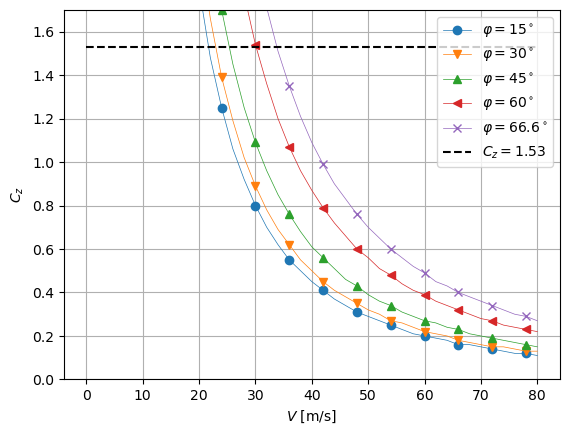

In [782]:


df_cz = pd.DataFrame(columns=[f"cz_{i}" for i in phi_list], index=v)

for phi in phi_list:
    df_cz[f"cz_{phi}"] = cz(650, v, phi)
    
    
df_cz = df_cz.round(2)
# write columns so they are in format $C_z (<angle> ^{\circ]})$
df_cz.columns = [f"$C_z (\\varphi = {i}^\\circ)$" for i in phi_list]


with open("../latex_raport/cz_table.tex", "w") as f:
    f.write(df_cz.to_latex(
        escape = False,
        float_format="%.2f",
    ))

fig, ax = plt.subplots()

for marker,phi in zip(markers,phi_list):
    ax.plot(v, df_cz[f"$C_z (\\varphi = {phi}^\\circ)$"], label = f"$\\varphi = {phi}^\\circ$", marker = marker, linewidth = 0.5, markevery=3)

# df_cz.plot()
# set limit on plot
ax.grid()
ax.set_ylim(0, 1.7)
ax.set_xlabel("$V$ [m/s]")
ax.set_ylabel("$C_z$")
ax.hlines(1.53, 0, 80, linestyles="dashed", label = "$C_z = 1.53$", color = 'black')

ax.legend()
plt.savefig("../latex_raport/img/cz_plot.png", dpi = 200)

In [783]:
df_cx = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="proj2_copy",usecols="L:Z", skiprows=1)
df_cx = df_cx[df_cx['alpha']>-14]
df_cx = df_cx[df_cx['alpha']<14]

cx_poly = np.polyfit(df_cx["cz"], df_cx["C_x samolot"], 7)
cx_p = np.poly1d(cx_poly)

### Moce 

In [784]:
def n_zakr(N, phi):
    return N/np.cos(np.deg2rad(phi))

def n_zakr_max(N, v):
    
    part = 2*650*9.81/(1.225*15*1.53*0.8*v**2)    
    
    return N/part

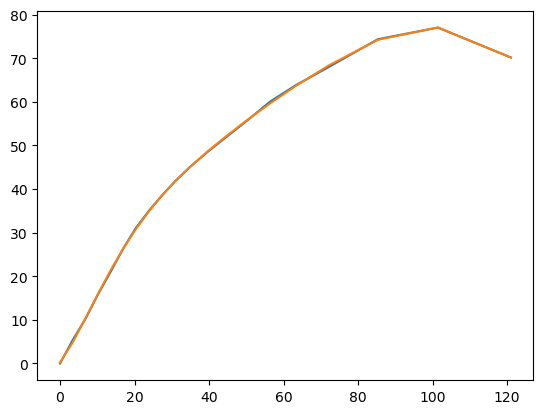

In [785]:
df_nr = pd.read_csv("nr.csv")
plt.plot(df_nr['V'], df_nr['Nr'])

# polyfit for Nr
poly = np.polyfit(df_nr['V'], df_nr['Nr'], 8)
poly_nr = np.poly1d(poly)

plt.plot(df_nr['V'], poly_nr(df_nr['V']))

C:\Users\marek\AppData\Local\Temp\ipykernel_27684\764713310.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return 2*m*9.81/(rho*S*v**2*np.cos(np.deg2rad(phi)))
c:\Users\marek\anaconda3\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\4107568014.py:6: RuntimeWarning: divide by zero encountered in true_divide
  part = 2*650*9.81/(1.225*15*1.53*0.8*v**2)
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\4107568014.py:6: RuntimeWarning: divide by zero encountered in true_divide
  part = 2*650*9.81/(1.225*15*1.53*0.8*v**2)
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\3064188545.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_ticks)
C:\Users\marek\AppData\Local\Temp\ipykernel_27684\3064188545.py:72: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base i

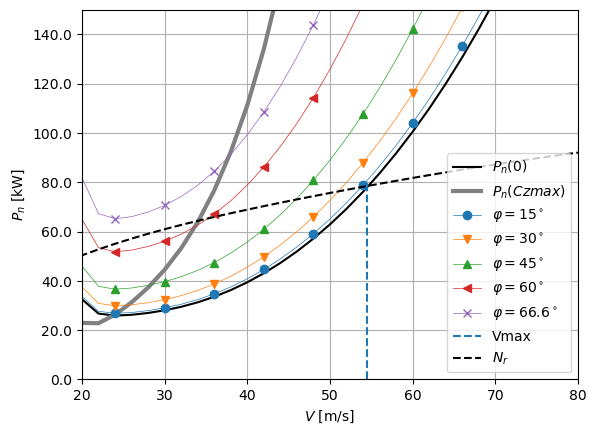

In [786]:

df_p = pd.DataFrame(columns=[f"Pn_{i}" for i in phi_list], index=v)
cz_l = cz(650, v, 0)
cx_l = cx_p(cz_l)

rho = 1.225
S = 15

df_p["Pn"] = 1/2 * rho*S*v**3*cx_l

for phi in phi_list:
    df_p[f"Pn_{phi}"] = n_zakr(df_p["Pn"], phi)
    

df_p["Nr"] = poly_nr(df_p.index) + 20
df_p4 = df_p.copy()    
df_p.columns = [f"$P_n (\\varphi = {i}^\\circ)$" for i in phi_list] + ["$P_n(\\varphi = {0}^\\circ)$", "$N_r$" ]

fig, ax = plt.subplots()



ax.plot(v, df_p['$P_n(\\varphi = {0}^\\circ)$'], label = "$P_n (0)$", color = 'black', linestyle = "solid")


df_x = pd.DataFrame()
df_x['v'] = v
df_x['Px'] = n_zakr_max(df_p['$P_n(\\varphi = {0}^\\circ)$'], v)
# df_x = df_x[(df_x['v']>21) & (df_x['v']<38)]

# plt.plot(df_x['v'], df_x['Px'] 

# ax.plot(df_x['v'], df_x['Px']*1000, label = "$P_n (0)$", color = 'black', linestyle = "solid")

ax.plot(v, n_zakr_max(df_p['$P_n(\\varphi = {0}^\\circ)$'], v), label = "$P_n (Czmax)$", color = 'grey', linestyle = "solid", linewidth = 3)

for marker,phi in zip(markers,phi_list):
    df_temp = df_p.copy()
    ax.plot(v, df_p[f"$P_n (\\varphi = {phi}^\\circ)$"], label = f"$\\varphi = {phi}^\\circ$", marker = marker, linewidth = 0.5, markevery=3)
    

# df_p.plot()

ax.set_ylim(0, 150000)
ax.set_xlim(20, 80)
ax.set_xlabel("$V$ [m/s]")
ax.set_ylabel("$P_n$ [kW]")
ax.vlines(54.5, 0, 78*1000, label = "Vmax", linestyles='dashed')

ax.grid()

# change y ticks labels to be in Kw not W
y_ticks = plt.gca().get_yticks()
y_ticks = y_ticks/1000
plt.gca().set_yticklabels(y_ticks)

ax.plot(v, df_p['$N_r$']*1000, label = "$N_r$", color = 'black', linestyle = "dashed")

plt.savefig("../latex_raport/img/Pr_plot.png", dpi = 200)
ax.legend()


with open("../latex_raport/Pr_table.tex", "w") as f:
    df_p1 = df_p.round(2)
    df_p1 = df_p1[df_p1.index>5]
    
    # divide by 1000 to get kW
    df_p1 = df_p1/1000
    # rename columns and write unit kW to each column
    df_p1.columns = [f"$P_n (\\varphi = {i}^\\circ)$ [kW]" for i in phi_list] + ["$P_n(\\varphi = {0}^\\circ)$ [kW]", "$N_r$ [kW]" ]
    
    
    f.write(df_p1.to_latex(
        escape = False,
        float_format="%3.2f",
    ))
    
plt.savefig("../latex_raport/img/Pr_plot.png", dpi = 200)

In [787]:
df_x

,v,Px
0,0.0,NaN
1,2.0,NaN
2,4.0,1.906677e+13
3,6.0,NaN
4,8.0,3.703805e+10
5,10.0,NaN
6,12.0,9.507661e+08
7,14.0,NaN
8,16.0,6.945510e+07
9,18.0,NaN


### linie do phi_max(v)

In [788]:
df_p2

,Pn_15,Pn_30,Pn_45,Pn_60,Pn_66.6,Pn,Nr
16.0,216447.870388,241416.229985,295673.289545,418145.176106,526435.096303,209072.588053,44979.662821
18.0,64096.638994,71490.511377,87557.637163,123825.197965,155893.057580,61912.598982,47762.370647
20.0,33691.390067,37577.862782,46023.294720,65086.767578,81942.733567,32543.383789,50364.398689
22.0,27669.904784,30861.768633,37797.792855,53454.151283,67297.538957,26727.075642,52789.620946
24.0,26818.800488,29912.485140,36635.162766,51809.944043,65227.520106,25904.972021,55047.831211
26.0,27163.398835,30296.834654,37105.892862,52475.656929,66065.637218,26237.828465,57152.659419
28.0,27933.998606,31156.327017,38158.551725,53964.341371,67939.856465,26982.170685,59119.889432
30.0,29039.721490,32389.600643,39668.997274,56100.433950,70629.147571,28050.216975,60966.132489
32.0,30514.941380,34034.994629,41684.185120,58950.339933,74217.113225,29475.169966,62707.813007
34.0,32402.648616,36140.458469,44262.841160,62597.110277,78808.312663,31298.555139,64360.425785


,Pn_15,Pn_30,Pn_45,Pn_60,Pn_66.6,Pn,Nr
0.0,NaN,NaN,NaN,NaN,NaN,NaN,20.213828
2.0,2.798188e+15,3.120973e+15,3.822396e+15,5.405684e+15,6.805631e+15,2.702842e+15,22.778736
4.0,1.358902e+12,1.515658e+12,1.856294e+12,2.625196e+12,3.305061e+12,1.312598e+12,25.767971
6.0,1.550354e+10,1.729196e+10,2.117824e+10,2.995055e+10,3.770705e+10,1.497527e+10,28.997855
8.0,6.370653e+08,7.105540e+08,8.702474e+08,1.230716e+09,1.549443e+09,6.153579e+08,32.328039
10.0,5.202515e+07,5.802651e+07,7.106767e+07,1.005049e+08,1.265333e+08,5.025243e+07,35.654270
12.0,6.440709e+06,7.183677e+06,8.798172e+06,1.244249e+07,1.566481e+07,6.221247e+06,38.902010
14.0,1.049721e+06,1.170811e+06,1.433945e+06,2.027904e+06,2.553085e+06,1.013952e+06,42.020854
16.0,2.164479e+05,2.414162e+05,2.956733e+05,4.181452e+05,5.264351e+05,2.090726e+05,44.979663
18.0,6.409664e+04,7.149051e+04,8.755764e+04,1.238252e+05,1.558931e+05,6.191260e+04,47.762371


phi = 15, pn = 77372.32752839103, nr = 77370.88827434322, v = 52.67332673326734
phi = 30, pn = 75536.04877850413, nr = 75533.55787308872, v = 49.77169771697717
phi = 45, pn = 72977.94546216354, nr = 72976.2534897998, v = 45.86685866858669
phi = 60, pn = 68508.24813963473, nr = 62542.93945152282, v = 31.805918059180595
phi = 66.6, pn = 86250.29838413, nr = 62542.93945152282, v = 31.805918059180595


<AxesSubplot:>

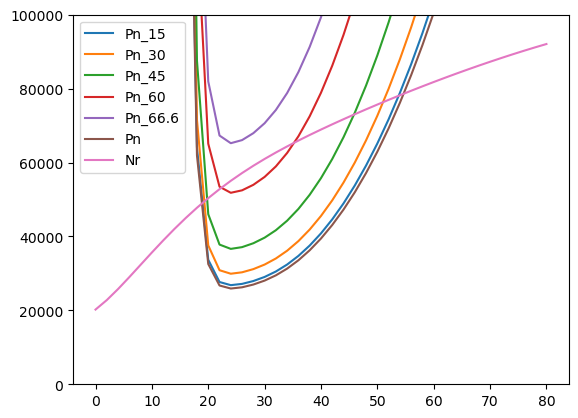

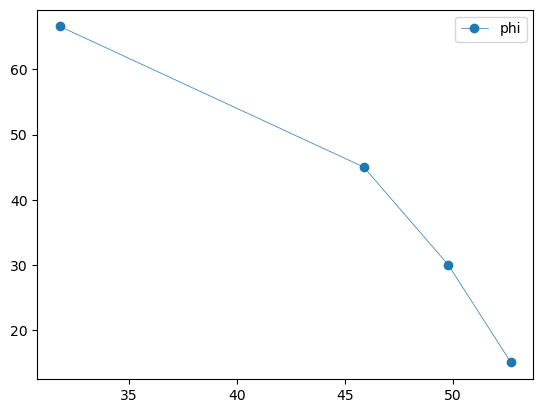

In [789]:
df_p2 = df_p4.copy()
display(df_p2)

df_p2["Nr"] = df_p2["Nr"]*1000

df_p2.plot()
plt.ylim(0, 100000)

df_p2 = df_p2[df_p2.index >15]


df_vs = pd.DataFrame()

for phi in phi_list:
    
    new_v = np.linspace(0, 80, 100000)
    # create polyfit for Pn (new_v)
    poly = np.polyfit(df_p2.index, df_p2[f"Pn_{phi}"], 8)
    poly_pn = np.poly1d(poly)
    
    poly = np.polyfit(df_p2.index, df_p2['Nr'], 8)
    poly_nr = np.poly1d(poly)
    
        
    for pn, nr,v in zip (poly_pn(new_v), poly_nr(new_v), new_v):
        
        if pn > nr and v > 31.8052:
            print(f"phi = {phi}, pn = {pn}, nr = {nr}, v = {v}")
            df_vs.loc[v, f"phi"] = phi
            break

df_vs.plot(marker = "o", linewidth = 0.5)


### Zakęt przy stałym kącie natarcia 

In [790]:
def mg(v, cz_max):
    cz = 0.8*cz_max
    return cz*1.225*15*v**2/(2*650*9.81)



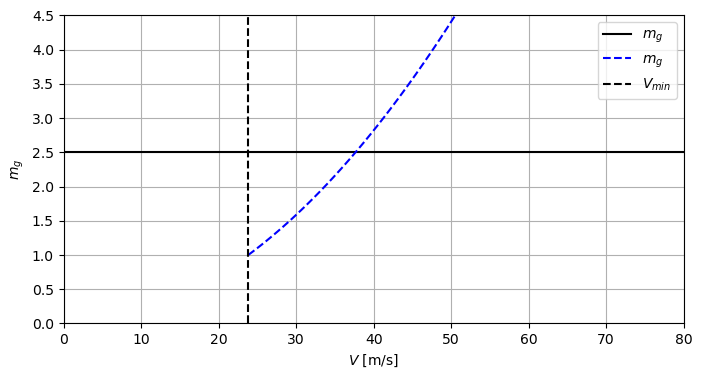

In [791]:
fig, ax = plt.subplots(figsize= (8, 4))

m_g = 2.5

df_mg = pd.DataFrame()


v_czmax = np.sqrt(2*650*9.81/(1.225*15*1.53*0.8))
v_czmax_span = np.linspace(v_czmax, 80, 100)

df_mg['v'] = v_czmax_span
df_mg['m_g'] = mg(v_czmax_span, 1.53)
df_mg["phi"] = np.arccos(1/df_mg['m_g'])*180/np.pi
df_mg['r'] = r_tan(df_mg['phi'], df_mg['v'])


ax.axhline(m_g, label = "$m_g$", color = 'black', linestyle = "solid")
ax.plot(v_czmax_span, mg(v_czmax_span, 1.53), label = "$m_g$", color = 'blue', linestyle = "dashed")
ax.axvline(v_czmax, label = "$V_{min}$", color = 'black', linestyle = "dashed")

ax.legend()
ax.grid()
ax.set_xlabel("$V$ [m/s]")
ax.set_ylabel("$m_g$")
ax.set_ylim(0,m_g +2)
ax.set_xlim(0, 80)

plt.savefig("../latex_raport/img/mg_plot.png", dpi = 200)


### Wykres końcowy

In [792]:
def phi_v(v, cz_max, coef):
    cz_max = cz_max*coef
    return np.arccos(2*650*9.81/(1.225*15*v**2*cz_max))*180/np.pi

In [793]:
# df_vs sort by index (v)

df_vs.at[38, 'phi'] = 58
df_vs.at[55, 'phi'] = 0

df_vs = df_vs.sort_index()


C:\Users\marek\AppData\Local\Temp\ipykernel_27684\4242825603.py:3: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(2*650*9.81/(1.225*15*v**2*cz_max))*180/np.pi


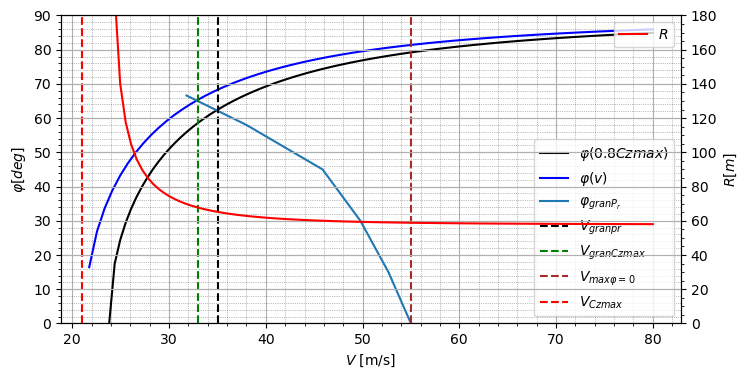

In [794]:
fig, ax = plt.subplots(figsize= (8, 4))
ax.set_xlabel("$V$ [m/s]")
ax.set_ylim(0,90)


# phi
ax.plot(df_mg['v'], df_mg['phi'], label = "$\\varphi(0.8Cz{max})$", color = 'black', linestyle = "solid")
long_v = np.linspace(1, 80, 100)
ax.plot(long_v, phi_v(long_v, 1.53, 1), label = "$\\varphi(v)$ ", color = 'blue', linestyle = "solid")
ax.set_ylabel("$\\varphi [deg]$")
ax.plot(df_vs.index, df_vs['phi'], label = "$\\varphi_{gran P_r}$")

# R
ax2 = ax.twinx()
ax2.set_ylabel("$R [m]$")
ax2.set_ylim(0, 180)
ax2.plot(df_mg['v'], df_mg['r'], label = "$R$", color = 'red', linestyle = "solid")

# velocities
ax.axvline(35.1, label = "$V_{gran pr}$", color = 'black', linestyle = "dashed")
ax.axvline(33, label = "$V_{gran Cz max}$", color = 'green', linestyle = "dashed")
ax.axvline(55, label = "$V_{max \\varphi = 0}$", color = 'brown', linestyle = "dashed")
ax.axvline(21, label = "$V_{Czmax}$", color = 'red', linestyle = "dashed")


ax.legend()
ax2.legend()

# ax set minor ticks
ax.minorticks_on()

# ax2 set minor ticks
ax2.minorticks_on()

# ax set minor grid lines
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black', alpha = 0.5)  


ax.grid()
ax2.grid()

plt.savefig("../latex_raport/img/phi_r_plot.png", dpi = 200)